<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [3]:
!pip install kmeans

  Preparing metadata (setup.py) ... done
  Created wheel for kmeans: filename=kmeans-1.0.2-cp312-cp312-linux_x86_64.whl size=12544 sha256=3df61c49d87fa92c70ff18f3cfc4303e7bd8ef4614ff74bdd157c60a40803a25
  Stored in directory: /root/.cache/pip/wheels/da/91/c9/54cabb3877a559e9e03ba0c9d18f376990508ff238ead84ada
Successfully built kmeans


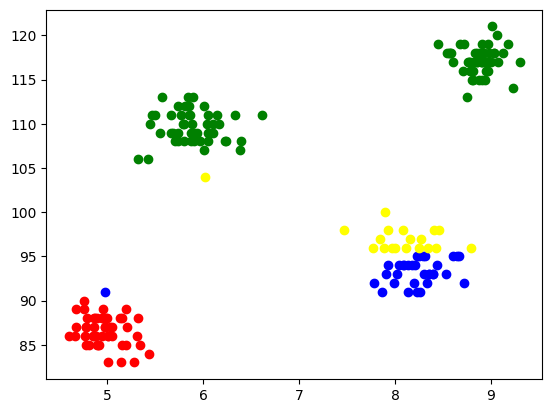

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# from kmeans import KMeans
import pandas as pd

#centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
#cluster_std = [1,1,1,1]

#X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

#plt.scatter(X[:,0],X[:,1])

df = pd.read_csv('/content/student_clustering.csv')

X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/content/student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


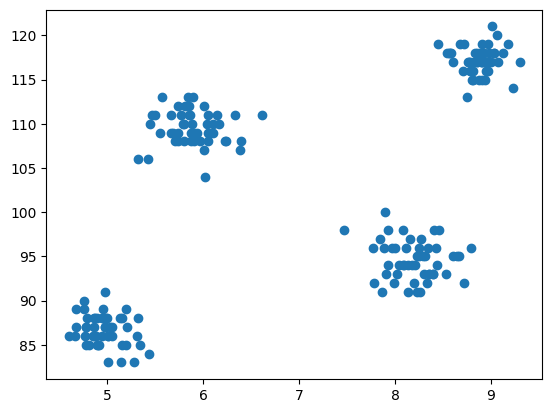

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"], df["iq"])

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [11]:
wcss

[29957.898287999997,
 4184.141269999999,
 2364.0055834200834,
 681.9696600000001,
 582.7491892238328,
 417.8541311203876,
 312.0743312360444,
 242.25461777981246,
 239.03068215587203,
 188.97024470280112]

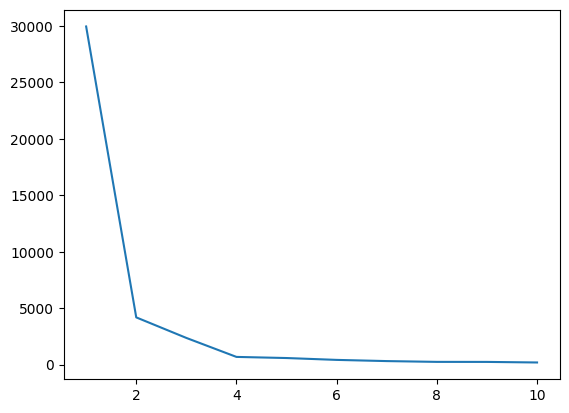

In [12]:
plt.plot(range(1,11), wcss)

In [14]:
X = df.iloc[:, :].values # here, all rows and columns are extracted. this converts pd dataframe to numpy array
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [15]:
y_means

array([2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 2,
       3, 3, 0, 1, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 0, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       3, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 3, 3,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 2, 2, 1, 0, 3, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 0, 1, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 0,
       3, 1, 2, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 0, 2, 3, 1,
       1, 3], dtype=int32)

In [18]:
X

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [16]:
X[y_means == 1,1] # values of y-axis of cluster 1

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

In [17]:
X[y_means == 1,0] # values of x-axis of cluster 1

array([5.9 , 5.45, 5.88, 5.79, 6.1 , 5.71, 5.5 , 6.05, 5.84, 5.43, 6.01,
       5.32, 5.91, 5.57, 6.4 , 5.67, 6.05, 5.85, 5.87, 6.02, 5.77, 6.06,
       5.55, 5.81, 5.47, 5.74, 5.8 , 5.88, 5.91, 5.67, 5.74, 5.69, 6.05,
       6.14, 5.74, 5.94, 5.86, 6.38, 6.61, 6.04, 6.24, 6.1 , 5.8 , 5.87,
       5.97, 6.17, 6.01, 6.33, 5.85, 6.23])

/tmp/ipython-input-843782787.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


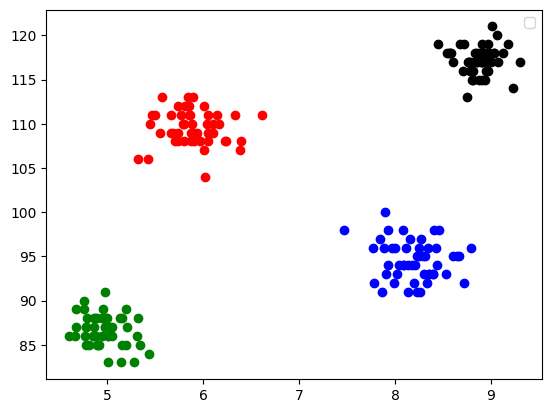

In [21]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color="blue")
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color="red")
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color="green")
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color="black")
plt.legend()
plt.show()

In [22]:
from sklearn.datasets import make_blobs
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

R,s = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

In [23]:
R

array([[-5.3135082 , -4.22898826],
       [ 4.34674973,  5.84245628],
       [-4.49711858, -6.24528809],
       [ 5.69511961,  2.96653345],
       [ 2.86505352, -1.72591797],
       [-5.26905696, -2.76863321],
       [-7.1361961 , -3.35972919],
       [-1.70082   ,  3.76261366],
       [ 2.95967695,  5.04625552],
       [ 2.89652016, -2.81461744],
       [ 3.61788673, -2.77424209],
       [ 6.60869262, -1.67887912],
       [-4.49814279, -5.8442137 ],
       [ 3.11014409, -2.0765031 ],
       [ 1.04663565, -2.83801778],
       [ 4.03176032, -4.48584577],
       [-2.82504963,  1.93976549],
       [ 5.82470301,  6.24821292],
       [ 4.53799465,  5.35088849],
       [ 4.32232442,  3.56056097],
       [ 6.36723542,  6.21788563],
       [ 5.38186623,  5.56627544],
       [ 2.27175244, -4.56961226],
       [-4.44854596, -2.70779199],
       [ 3.46078194, -1.74162965],
       [-5.0191305 , -3.82499878],
       [ 2.03165374, -3.75472031],
       [-6.42121723, -5.1534952 ],
       [ 4.61848352,

In [24]:
s

array([0, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 0, 3, 3, 3, 2, 1, 1, 1, 1, 1,
       3, 0, 3, 0, 3, 0, 1, 2, 3, 2, 0, 1, 0, 0, 3, 2, 3, 2, 0, 1, 2, 2,
       1, 2, 3, 0, 3, 3, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 3, 0,
       2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 3, 3, 3, 0, 3, 1, 0, 2,
       1, 0, 3, 1, 0, 2, 3, 1, 3, 0, 0, 3])

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x = R[:,0], y = R[:,1], z = X[:,2])
fig.show()

# 1. Scaling the data (Important in real-world cases)

KMeans is distance-based, so features with larger ranges can dominate.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Silhouette Score / Davies-Bouldin Index (For cluster validation)

Besides WCSS, metrics like silhouette score help validate how well-separated clusters are.

In [29]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_means)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.7349682510969364


# 3. 📊 Plot cluster centers (especially for interpretability)

In your scatter plots, you can mark the centroids:

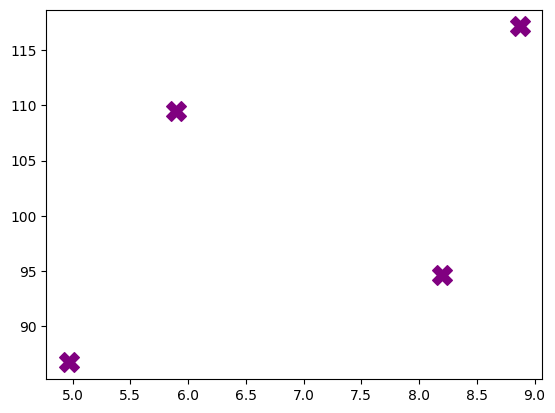

In [30]:
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', color='purple', label='Centroids')

# 4. 📁 Labeling & Legends (Improving visualization clarity)

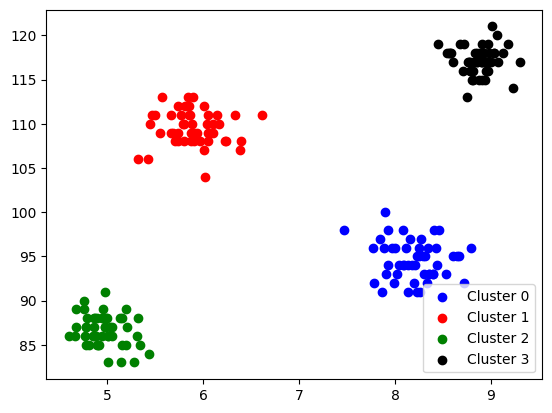

In [31]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='blue', label='Cluster 0')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='red', label='Cluster 1')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green', label='Cluster 2')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color='black', label='Cluster 3')
plt.legend()

# ✅ 1. K-Means++ Initialization (Better Centroid Initialization)
🔹 Why:

The standard K-Means uses random initialization, which can lead to:

Poor convergence (local minima)

Long training times

Uneven cluster separation

🔹 K-Means++:

A smarter way to initialize centroids to improve clustering performance.

🔹 In sklearn:

You already get it by default!

In [33]:
KMeans(n_clusters=4, init='k-means++')  # This is default

KMeans(n_clusters=4)

# ✅ 2. MiniBatch K-Means (Faster for Large Datasets)
🔹 Why:

Standard K-Means recalculates distances to all data points on each iteration, which is slow for large datasets.

🔹 MiniBatch KMeans:

Uses small random batches of data to update centroids quickly.

# **🔹 Use case:**

Real-time applications

Streaming data

Large-scale clustering

In [34]:
from sklearn.cluster import MiniBatchKMeans

mbkm = MiniBatchKMeans(n_clusters=4, batch_size=20, random_state=42)
y_mini = mbkm.fit_predict(X)

# ✅ 3. Adding Scaling (Feature Standardization)

🔹 Why:

K-Means is distance-based. Features with large ranges dominate.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 PART 2: Evaluation Metrics for Clustering

✅ Silhouette Score

Measures how similar a point is to its own cluster compared to others.

🔹 Range:

-1 = incorrect clustering

0 = overlapping clusters

+1 = dense and well-separated clusters

In [36]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, y_means)  # Use scaled data if applicable
print(f"Silhouette Score: {score}")

Silhouette Score: 0.8605024348886897


# **✅ Davies-Bouldin Index**

Lower is better; measures average similarity between each cluster and its most similar one.

In [37]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, y_means)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.20101696935794028


# ✅ Cluster Labeling / Interpretation

This is manual, but powerful:

Analyze what each cluster represents

For example, if clustering students by CGPA & IQ:

In [38]:
df['cluster'] = y_means
for i in range(4):
    print(f"\nCluster {i}")
    print(df[df['cluster'] == i].describe())


Cluster 0
           cgpa          iq  cluster
count  50.00000   50.000000     50.0
mean    8.19980   94.600000      0.0
std     0.26922    2.175935      0.0
min     7.47000   91.000000      0.0
25%     8.00500   93.000000      0.0
50%     8.22000   94.500000      0.0
75%     8.35750   96.000000      0.0
max     8.79000  100.000000      0.0

Cluster 1
            cgpa         iq  cluster
count  50.000000   50.00000     50.0
mean    5.894800  109.52000      1.0
std     0.264569    1.90852      0.0
min     5.320000  104.00000      1.0
25%     5.740000  108.00000      1.0
50%     5.875000  109.00000      1.0
75%     6.050000  111.00000      1.0
max     6.610000  113.00000      1.0

Cluster 2
            cgpa         iq  cluster
count  50.000000  50.000000     50.0
mean    4.967600  86.700000      2.0
std     0.190483   1.740865      0.0
min     4.600000  83.000000      2.0
25%     4.852500  86.000000      2.0
50%     4.960000  87.000000      2.0
75%     5.050000  88.000000      2.0
max  

# 🎯 Goal: Improve initial centroid selection using K-Means++
🔹 Reminder: What does K-Means++ do?

Instead of picking all centroids randomly, it does the following:

Randomly pick the first centroid from the data points.

For each remaining data point, compute the distance to the nearest centroid already chosen.

Pick the next centroid probabilistically, giving higher probability to points farther away.

Repeat until k centroids are selected.

In [41]:
import numpy as np
import random

def initialize_kmeans_plus_plus(X, k,self):
    n_samples = X.shape[0]
    centroids = []

    # 1. Randomly choose the first centroid
    first_idx = random.randint(0, n_samples - 1)
    centroids.append(X[first_idx])

    # 2. Choose the remaining centroids
    for _ in range(1, k):
        # Compute distances to the nearest existing centroid
        distances = np.array([
            min(np.linalg.norm(x - centroid)**2 for centroid in centroids)
            for x in X
        ])

        # Compute probabilities proportional to distances
        probabilities = distances / distances.sum()

        # Choose the next centroid based on probabilities
        next_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_idx])

    return np.array(centroids)

In [ ]:
self.centroids = initialize_kmeans_plus_plus(X, self.n_clusters)

In [ ]:
from sklearn.metrics import silhouette_score

km_random = KMeans(n_clusters=4, max_iter=100)
km_random.fit_predict(X)
print("Silhouette (Random Init):", silhouette_score(X, km_random.assign_clusters(X)))

km_plus = KMeans(n_clusters=4, max_iter=100)
km_plus.centroids = initialize_kmeans_plus_plus(X, 4)
km_plus.fit_predict(X)
print("Silhouette (KMeans++):", silhouette_score(X, km_plus.assign_clusters(X)))